<a href="https://colab.research.google.com/github/SylwiaNowakowska/Data_Immersion/blob/main/ML_for_Data_Art_%26_Visualization_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

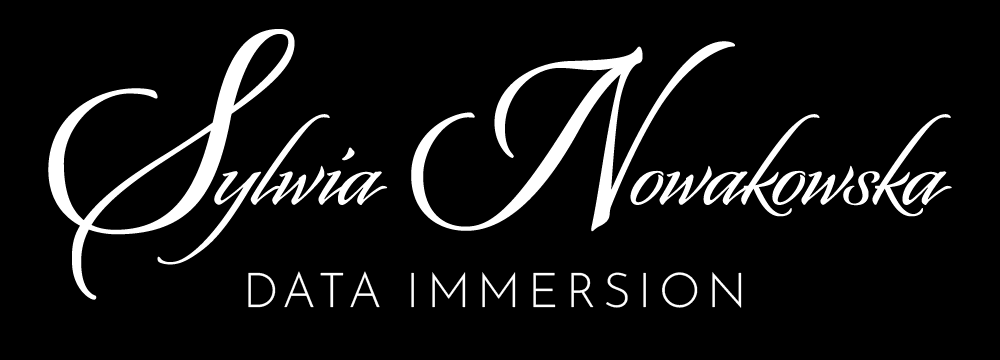

# ML for Data Art & Visualization: Dimensionality Reduction

This colab contains code from my article '[ML for Data Art & Visualization: Dimensionality Reduction](https://https://data-immersion.com/blog/ml-for-data-art-visualization-dimensionality-reduction)' published on [Data Immersion Blog](https://https://data-immersion.com/blog).

Feel free to copy it to your Google Drive and edit to fit your needs - Enjoy!

📢 📩 Stay Tuned!  If you're eager to dive deeper into the fascinating world of AI for Data Art & Visualization, [subscribe to our newsletter](https://https://data-immersion.com/subscribe)!  You'll get the latest insights, tutorials, and resources delivered straight to your inbox.

Best,
Sylwia

## Importing libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import umap

import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

## Functions

In [ ]:
def plot_explained_variance_ratio(exp_var_ratio: list[float], number_components: int = 3, color: str = "blue") -> None:
    """
    Plots the explained variance ratio of principal components.

    Parameters:
    - exp_var_ratio: Explained variance ratio from PCA.
    - number_components: Number of principal components to display.
    - color: Color for the bars and step line.
    """

    # Calculate the cumulative sum of the explained variance ratios
    cum_sum_eigenvalues = np.cumsum(exp_var_ratio)

    # Create a new figure and axes for the plot, set font size
    plt.figure(figsize=(8,5))
    plt.rcParams.update({'font.size': 16})

    # Plot the individual explained variance ratios as bars
    plt.bar(
            range(0, number_components),
            exp_var_ratio[ 0: number_components],
            color=color,
            alpha=0.6,
            align='center',
            label='Individual',
            tick_label=['PC ' + str(i+1) for i in range(number_components)]
            )

    # Plot the cumulative explained variance ratio as a step line
    plt.step(
        range(0,number_components),
        cum_sum_eigenvalues[ 0: number_components],
        color=color,
        alpha=0.5,
        where='mid',
        label='Cumulative')

    # Add a legend in the top-right corner
    plt.legend(loc='center right')

    # Calculate and display the sum of the explained variance for the selected components
    components_variance = round(exp_var_ratio[0:number_components].sum(), 2)
    plt.title(f"Explained variance ratio in {number_components} components: {components_variance}")

    # Label & show the plot
    plt.ylabel('Explained variance ratio', fontsize=18)
    plt.xlabel('Components', fontsize=18)
    plt.ylim([0,1])
    plt.tight_layout()
    plt.show()


def scatter_plot(
                df: pd.DataFrame,
                plot_dimensionality: str = '2D',
                category: pd.Series | list[str] | None = None,
                annotations: pd.Series | list[str] | None = None,
                title: str = "Scatterplot",
                figsize: tuple[int, int] = (10, 8),
                marker_size: int = 50,
                alpha: float = 0.8
            ) -> None:
    """
    Plots a 2D or 3D scatter plot based on the provided DataFrame.

    Parameters:
    - df: DataFrame containing the data to plot.
    - plot_dimensionality: Dimensionality of the plot ('2D' or '3D'). Defaults to '2D'.
    - category: Series or list specifying categories for color-coding. If None, all points have the same color.
    - annotations: Series or list specifying text annotations for data points. If None, no annotations are added.
    - title: Title of the plot. Defaults to "Scatterplot".
    - figsize: Tuple specifying the figure size (width, height) in inches. Defaults to (10, 8).
    - marker_size: Size of the data point markers. Defaults to 50.
    - alpha: Transparency of the data point markers (0.0 - 1.0). Defaults to 0.8.
    """

    # Create a new figure and axes for the plot, set font size
    fig = plt.figure(figsize=figsize)
    plt.rcParams.update({'font.size': 16, "axes.labelpad": 16})

    # Check if the plot should be 3D or 2D
    if plot_dimensionality == '3D':
        ax = fig.add_subplot(111, projection='3d')  # Create a 3D plot
        xaxis_name, yaxis_name, zaxis_name = df.columns[:3]  # Use first three columns for plotting
    elif plot_dimensionality == '2D':
        ax = fig.add_subplot(111)  # Create a 2D plot
        xaxis_name, yaxis_name = df.columns[:2]  # Use first two columns for plotting
    else:
        print(f'Error: plot_dimensionality needs to be "2D" or "3D", got {plot_dimensionality}')
        return

    # Handle categories (if provided) by assigning colors to different categories
    if category is not None:
        unique_categories = category.unique()
        num_categories = len(unique_categories)

        # Choose color palette based on the number of categories
        if num_categories <= 10:
            palette = sns.color_palette("tab10", n_colors=num_categories)
        elif num_categories <= 20:
            palette = sns.color_palette("tab20", n_colors=num_categories)
        else:
            palette = sns.color_palette("husl", n_colors=num_categories)

        # Plot each category separately
        for i, cat in enumerate(unique_categories):
            subset = df[category == cat]
            if plot_dimensionality == '3D':
                ax.scatter(subset[xaxis_name], subset[yaxis_name], subset[zaxis_name], label=cat, color=palette[i], s=marker_size, alpha=alpha)
            else:
                ax.scatter(subset[xaxis_name], subset[yaxis_name], label=cat, color=palette[i], s=marker_size, alpha=alpha)

        ax.legend(fontsize=16)  # Add a legend to distinguish categories
    else:
        # If no categories, plot points in a single color
        if plot_dimensionality == '3D':
            ax.scatter(df[xaxis_name], df[yaxis_name], df[zaxis_name], s=marker_size, alpha=alpha)
        else:
            ax.scatter(df[xaxis_name], df[yaxis_name], s=marker_size, alpha=alpha)

    # Add text annotations if provided
    if annotations is not None:
        for i, label in enumerate(annotations):
            if plot_dimensionality == '3D':
                ax.text(df.iloc[i, 0], df.iloc[i, 1], df.iloc[i, 2], str(label), fontsize=12, ha='right')
            else:
                ax.text(df.iloc[i, 0], df.iloc[i, 1], str(label), fontsize=12, ha='right')

    # Label & show the plot
    ax.set_title(title)
    ax.set_xlabel(xaxis_name)
    ax.set_ylabel(yaxis_name)

    if plot_dimensionality == '3D':
        ax.set_zlabel(zaxis_name)
        ax.grid(False)

    plt.tight_layout()
    plt.show()


def interactive_3d_plot(
                    df: pd.DataFrame,
                    category: pd.Series | list[str] | None = None,
                    title: str = "Interactive 3D Scatterplot",
                    marker_size: int = 100
                ) -> None:
    """
    Creates an interactive 3D scatter plot using plotly with correct color mapping.

    Parameters:
    - df: DataFrame containing the data to plot.
    - category: Series or list specifying categories for color-coding. If None, all points have the same color.
    - title: Title of the plot. Defaults to "Interactive 3D Scatterplot".
    - marker_size: Size of the data point markers. Defaults to 100.
    """

    # Get column names for axes
    xaxis_name, yaxis_name, zaxis_name = df.columns[:3]

    if category is not None:
        # Determine the categories
        unique_categories = category.unique()
        num_categories = len(unique_categories)

        # Select a color palette based on the number of categories
        if num_categories <= 10:
            palette = sns.color_palette("tab10", n_colors=num_categories).as_hex()
        elif num_categories <= 20:
            palette = sns.color_palette("tab20", n_colors=num_categories).as_hex()
        else:
            palette = sns.color_palette("husl", n_colors=num_categories).as_hex()

        # Create a dictionary to map categories to colors
        category_to_color = {cat: palette[i] for i, cat in enumerate(unique_categories)}

        # Create traces for each category
        data = []
        for cat in unique_categories:
            subset = df[category == cat]  # Get data for current category
            color = category_to_color[cat]  # Get corresponding color
            # Create a 3D scatter trace
            trace = go.Scatter3d(
                x=subset[xaxis_name],
                y=subset[yaxis_name],
                z=subset[zaxis_name],
                mode='markers',
                marker=dict(size=marker_size / 20, color=color),
                name=cat
            )
            data.append(trace)  # Add trace to the data list
    else:
        # Create a single trace for all data points if no categories are provided
        trace = go.Scatter3d(
            x=df[xaxis_name],
            y=df[yaxis_name],
            z=df[zaxis_name],
            mode='markers',
            marker=dict(size=marker_size / 20)
        )
        data = [trace]

    # Define layout settings (margins, title, axis labels)
    layout = go.Layout(
        margin=dict(l=0, r=0, b=0, t=40),
        title=title,
        scene=dict(
            xaxis=dict(title=xaxis_name),
            yaxis=dict(title=yaxis_name),
            zaxis=dict(title=zaxis_name)
        )
    )

    # Create the figure and display it
    fig = go.Figure(data=data, layout=layout)
    fig.show()


def generate_umap_matrix(
                      scaled_features: np.ndarray,
                      n_neighbors_list: list[int],
                      min_dist_list: list[float],
                      category: pd.Series | list[str] | None = None,
                      plot_titles: bool = False,
                      legend: bool = True
                      ) -> None:
    """
    Generates a matrix of UMAP scatter plots for different combinations of n_neighbors and min_dist parameters.

    Args:
        scaled_features: The 2D scaled feature data to be used for UMAP.
        n_neighbors_list: A list of n_neighbors values to try in UMAP.
        min_dist_list: A list of min_dist values to try in UMAP.
        category: The categorical labels corresponding to the feature data.
        plot_titles: Whether to display plot titles. Defaults to False.
        legend: Whether to display the legend in one plot. Defaults to True.
    """
    # Create a grid of subplots
    fig, axes = plt.subplots(len(min_dist_list), len(n_neighbors_list),
                             figsize=(len(n_neighbors_list) * 4, len(min_dist_list) * 4), squeeze=False)


    # Track whether the legend has been added
    legend_added = False


    for i, min_dist in enumerate(min_dist_list):
        for j, n_neighbors in enumerate(n_neighbors_list):
            # Apply UMAP transformation
            umap_fit = umap.UMAP(n_components=2, n_neighbors=n_neighbors, min_dist=min_dist)
            umap_components = umap_fit.fit_transform(scaled_features)

            # Create a DataFrame
            umap_df = pd.DataFrame(umap_components, columns=['UMAP 1', 'UMAP 2'])

            # Handle 1D axes cases
            ax = axes[i, j]

            # Scatter plot
            if category is not None:
                sns.scatterplot(x='UMAP 1', y='UMAP 2', hue=category, data=umap_df, ax=ax,
                                s=200, alpha=0.8, palette='husl', legend=legend and not legend_added)
                if legend and not legend_added:
                    legend_added = True  # Ensure the legend is added only once
                else:
                    if ax.get_legend() is not None:  # Check if legend exists before removing
                        ax.get_legend().remove()
            else:
                sns.scatterplot(x='UMAP 1', y='UMAP 2', data=umap_df, ax=ax, s=200, alpha=0.8)

            # Set titles if required
            if plot_titles:
                ax.set_title(f'n_neighbors={n_neighbors}, min_dist={min_dist}')

            # Remove axis ticks and labels
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel('')
            ax.set_ylabel('')


    plt.tight_layout()
    plt.show()

## Dataset loading

### Option 1 | Loading dataset from Python sklearn library

In [ ]:
# Loading the Iris dataset

from sklearn.datasets import load_iris

def load_iris_dataframe():
  """Loads the iris dataset into a pandas DataFrame."""
  iris = load_iris()
  df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
  df['category'] = [iris.target_names[i] for i in iris.target] #add target names as category and remove numerical target

  return df

dataset_df = load_iris_dataframe()
dataset_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),category
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Option 2 | Loading own dataset from Google Drive

In [ ]:
# # After executing this cell give Colab permission to access files on your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Fill in the path to your dataset
## You can access 'Files' in the left pane - navigate to the one needed and copy path
path = '/content/drive/MyDrive/.....'
dataset_df = pd.read_csv(path)
dataset_df.head()

## Scaling

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(dataset_df.drop(columns=['category'])) # Make sure to remove columns, which do not contain features
scaled_features.shape

(150, 4)

## PCA

### PCA - fitting

In [ ]:
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(data=principal_components)
pca_df.columns = ['PC ' + str(i+1) for i in range(pca_df.shape[1])]
print(pca_df.shape)
pca_df.head()

(150, 3)


,PC 1,PC 2,PC 3
0,-2.264703,0.480027,0.127706
1,-2.080961,-0.674134,0.234609
2,-2.364229,-0.341908,-0.044201
3,-2.299384,-0.597395,-0.091290
4,-2.389842,0.646835,-0.015738


In [ ]:
# if you like to save the output, optionally adjust the path, and then execute the cell
from google.colab import drive
drive.mount('/content/drive')

pca_df.to_csv('/content/drive/MyDrive/pca.csv', index=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### PCA - explained variance ratio

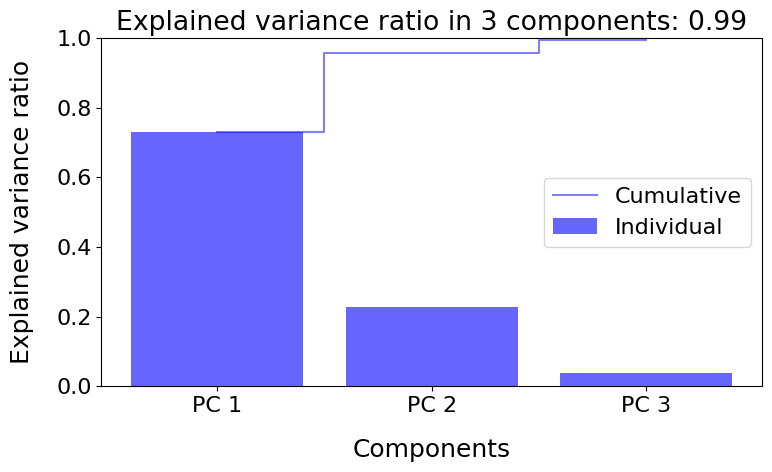

In [ ]:
exp_var_ratio = pca.explained_variance_ratio_
plot_explained_variance_ratio(exp_var_ratio, number_components=3, color="blue")

### PCA - 2D plot

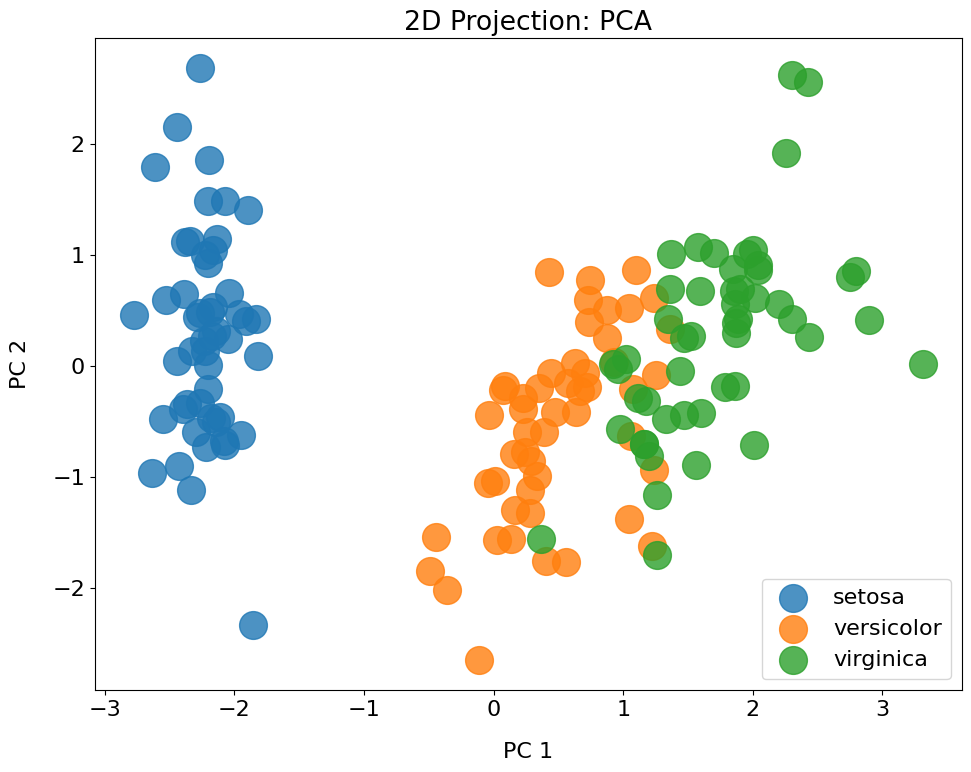

In [ ]:
scatter_plot(pca_df, plot_dimensionality='2D',category=dataset_df['category'], annotations=None, title='2D Projection: PCA', marker_size=400)

### PCA - 3D plot

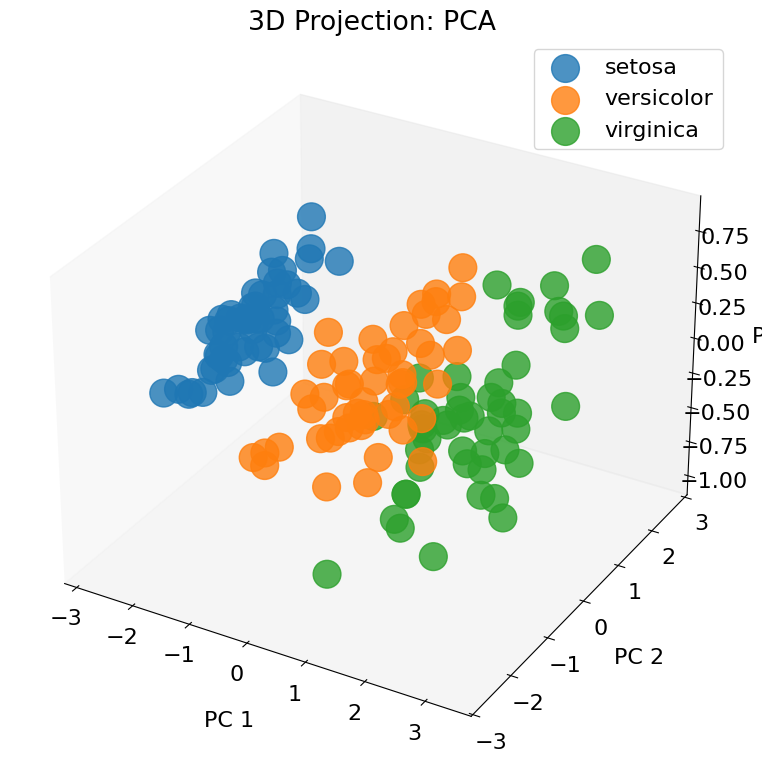

In [ ]:
scatter_plot(pca_df, plot_dimensionality='3D',category=dataset_df['category'], annotations=None, title='3D Projection: PCA', marker_size=400)

### PCA - interactive 3D plot

In [ ]:
interactive_3d_plot(pca_df, dataset_df['category'], 'Interactive 3D Projection: PCA', 200)

## UMAP

### UMAP matrix plot

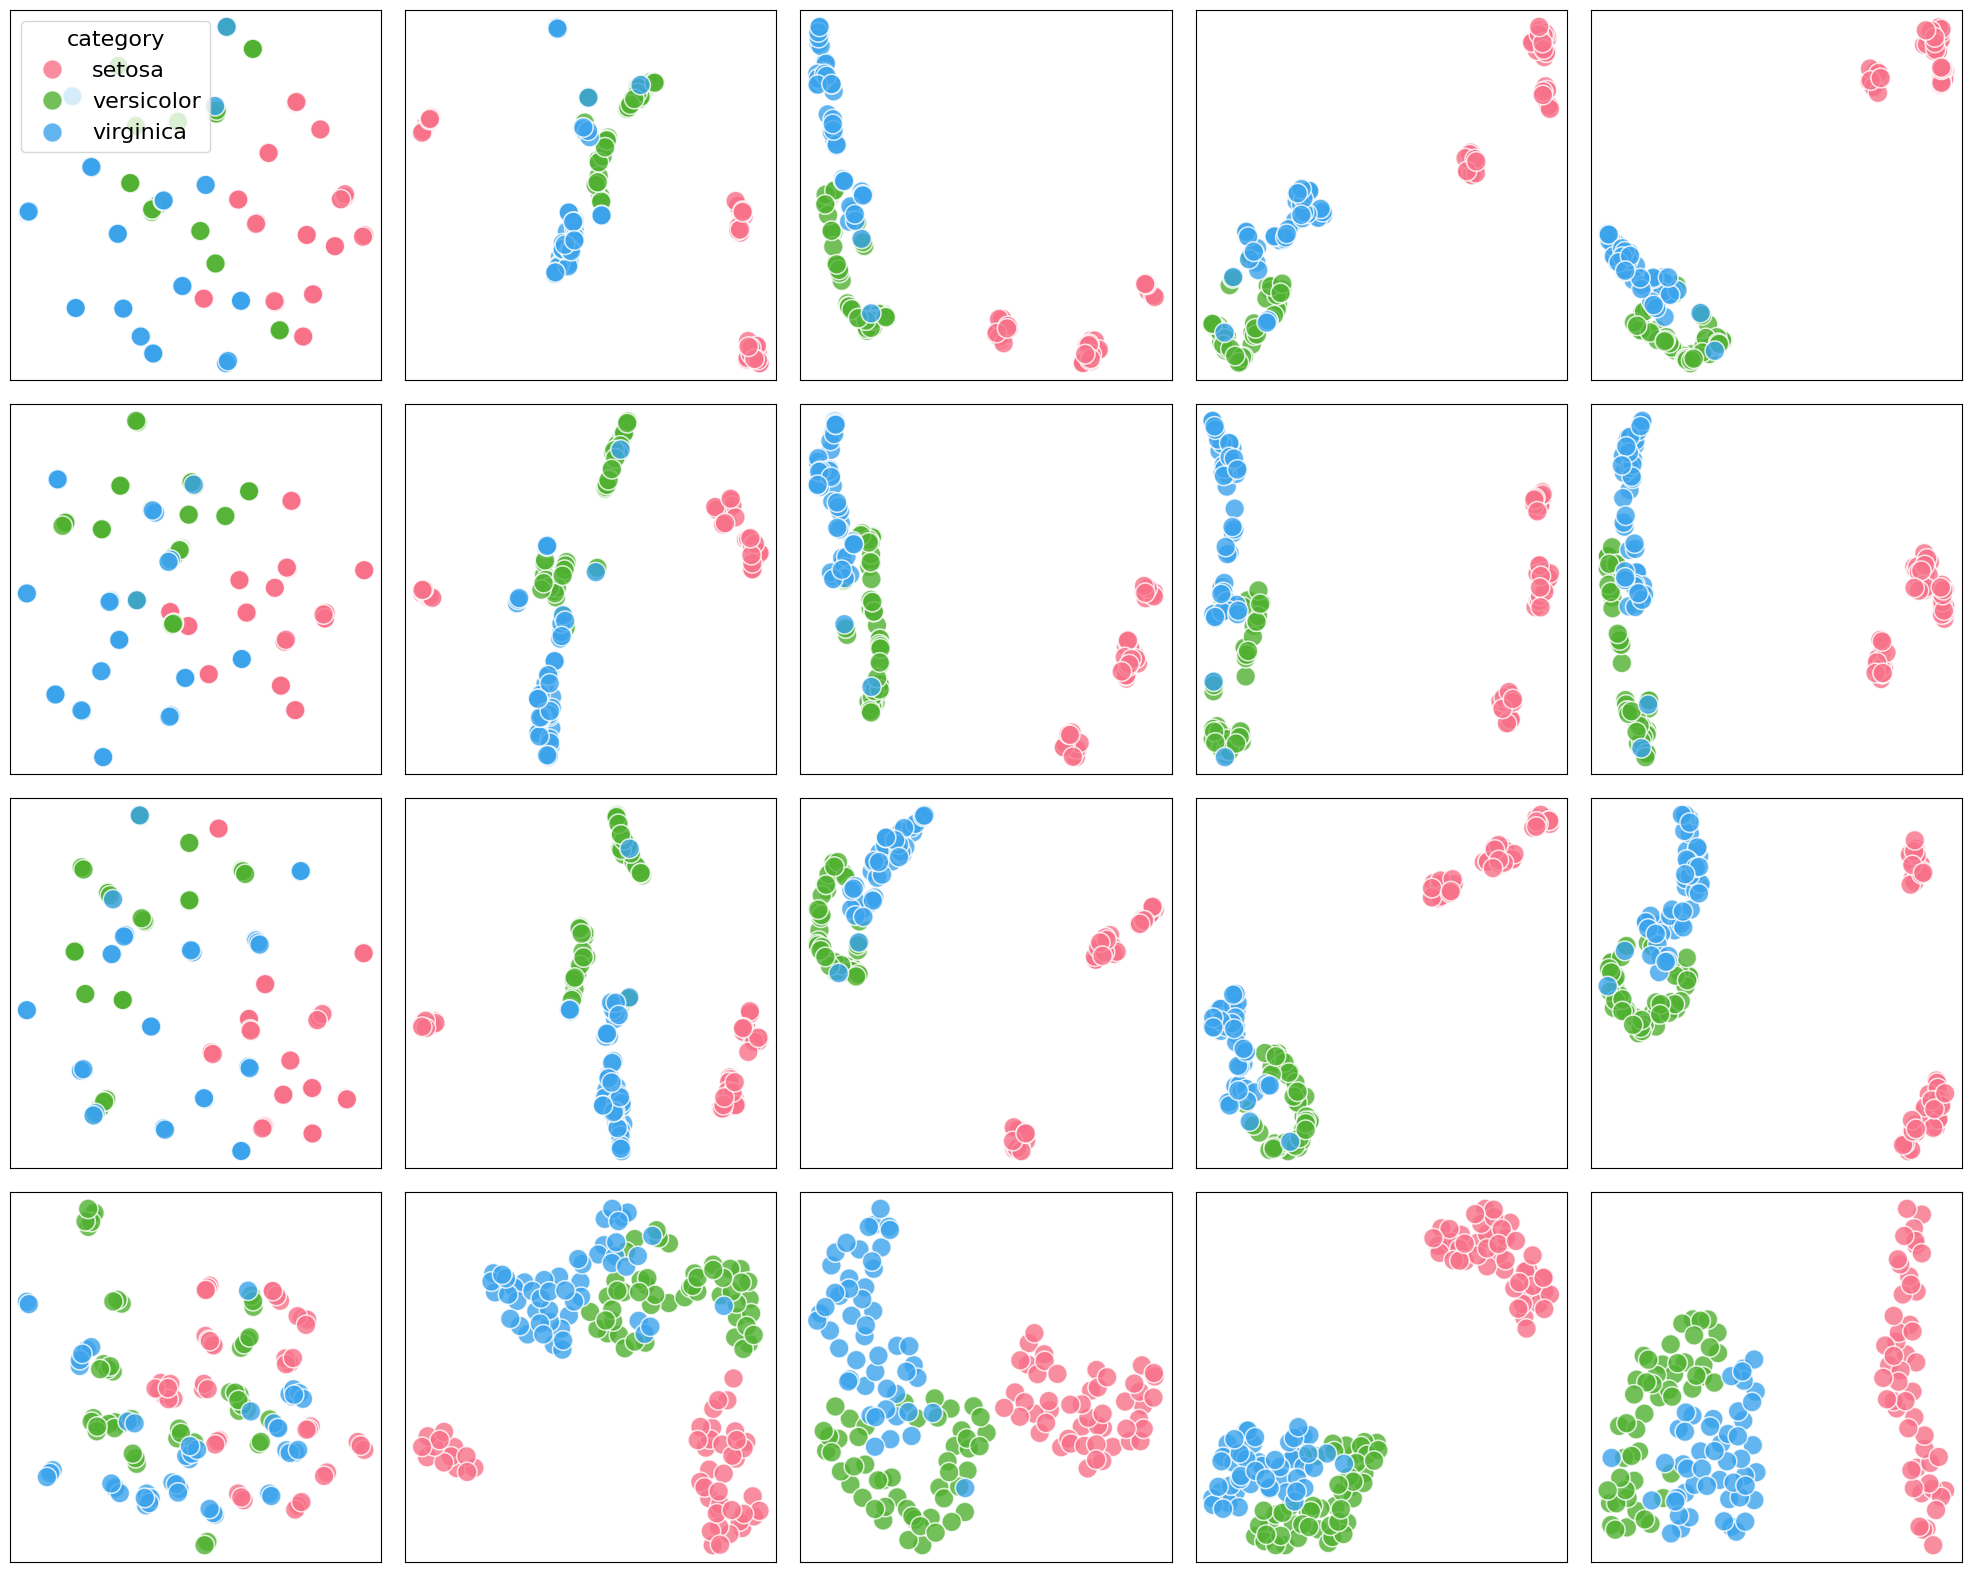

In [ ]:
n_neighbours = [2, 5, 8, 10, 15]
min_dist = [0.00, 0.01, 0.1, 1.0]
generate_umap_matrix(scaled_features, n_neighbours, min_dist, category=dataset_df['category'], plot_titles=False)

### UMAP - fitting (with chosen parameters)

In [ ]:
umap_fit = umap.UMAP(n_components=3, n_neighbors=10, min_dist=0.1)
umap_components = umap_fit.fit_transform(scaled_features)
umap_df = pd.DataFrame(data=umap_components)
umap_df.columns = ['UMAP ' + str(i+1) for i in range(umap_df.shape[1])]
umap_df.head()

,UMAP 1,UMAP 2,UMAP 3
0,12.623571,3.993417,2.238886
1,12.371323,1.517320,-0.955726
2,12.203944,1.853427,-0.369462
3,12.032998,1.832777,-0.499264
4,12.802704,4.329483,2.431481


In [ ]:
# if you like to save the output, optionally adjust the path, and then execute the cell
from google.colab import drive
drive.mount('/content/drive')

umap_df.to_csv('/content/drive/MyDrive/umap.csv', index=False)

### UMAP  - 2D plot

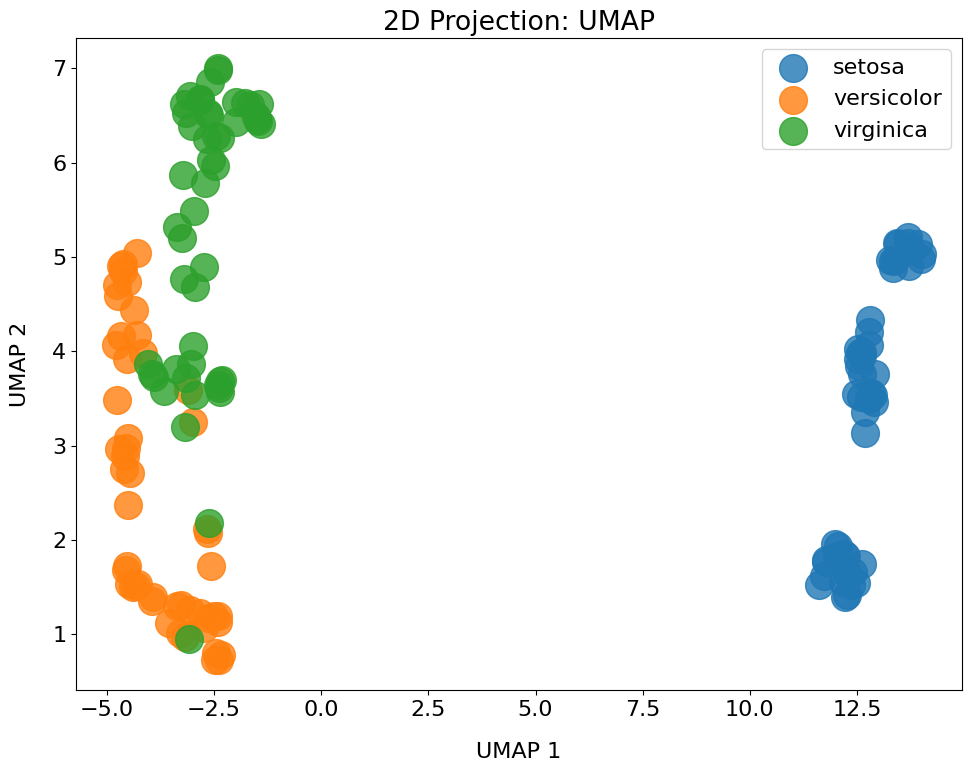

In [ ]:
scatter_plot(umap_df, plot_dimensionality='2D',category=dataset_df['category'], annotations=None, title='2D Projection: UMAP', marker_size=400)

### UMAP  - 3D plot

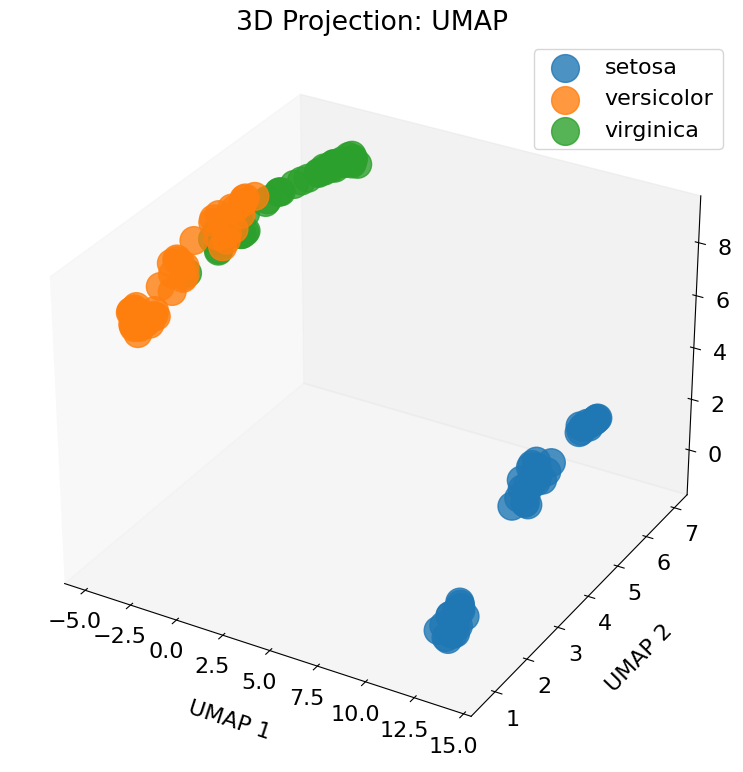

In [ ]:
scatter_plot(umap_df, plot_dimensionality='3D',category=dataset_df['category'], annotations=None, title='3D Projection: UMAP', marker_size=400)

### UMAP - interactive 3D plot

In [ ]:
interactive_3d_plot(umap_df, dataset_df['category'], 'Interactive 3D Projection: UMAP', 200)